Test sur une foction de R3->R, f(x,y,z)=x^2+y^2+z^2-48
Point fixe, nombre d'itérations :
99
(x,y) final
[ 1.90116806e-06 -1.26647461e-06  1.45811042e-05]
f(x,y) final
-47.999999999782176
Test sur une foction de R7->R avec affichage graphique, f(x,y)=(x-1)^2+(y-2)^2+(z-3)^2+(t-4)^2+(s-5)^2+(v-6)^2+(u-7)^2-55
Point fixe, nombre d'itérations :
261
(x,y) final
[1.57006209 1.31273265 3.82221529 4.07314009 5.93730315 6.45741406
 6.82281126]
f(x,y) final
-52.40214467420884
Test sur une foction de R2->R avec affichage graphique, f(x,y)=(x-1)^4+(y-4)^4-16


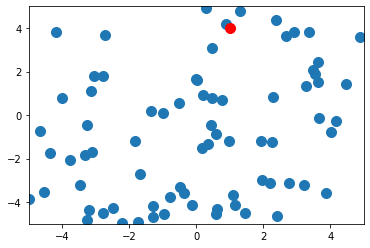

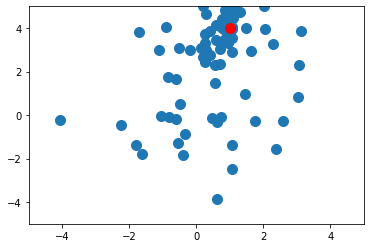

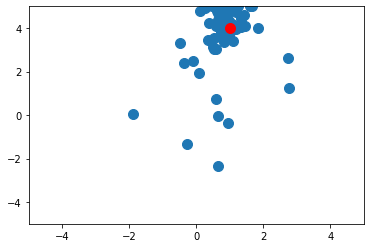

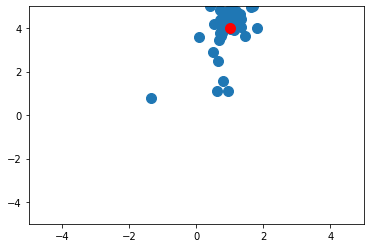

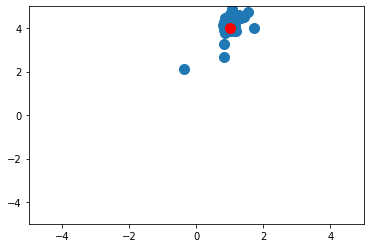

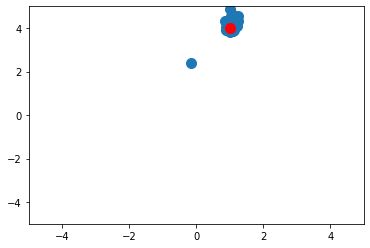

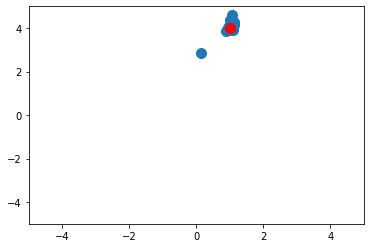

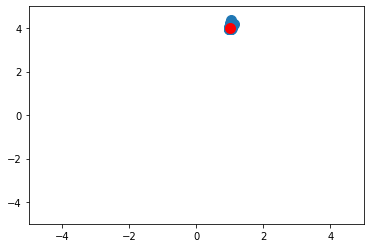

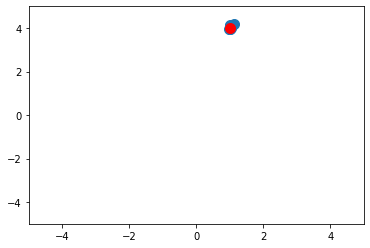

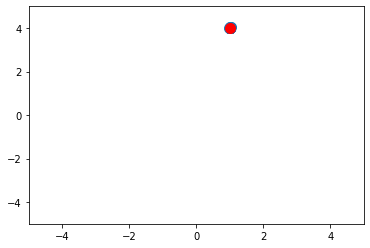

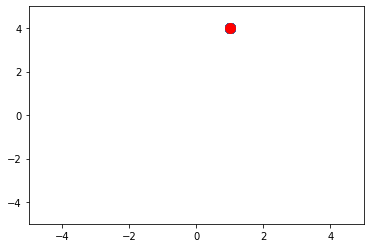

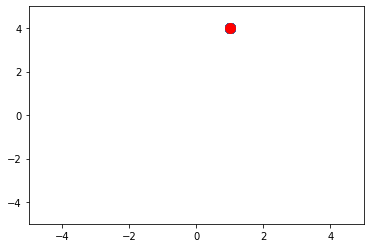

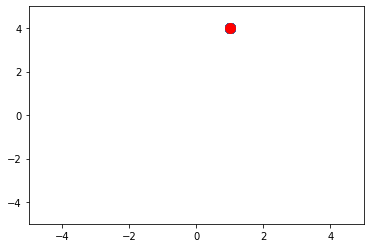

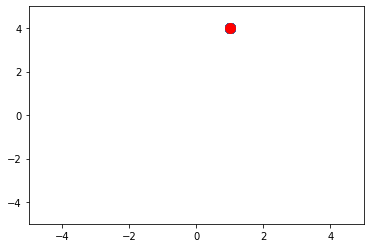

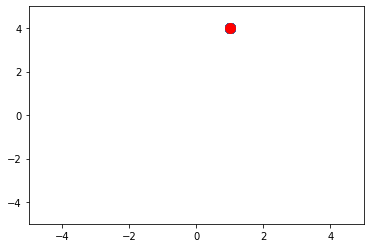

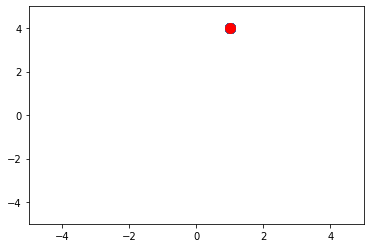

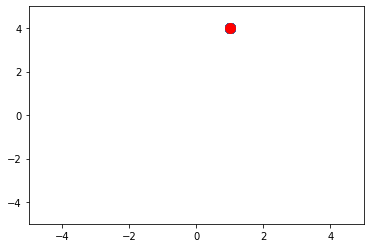

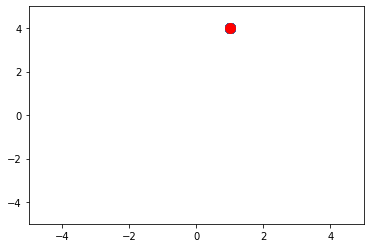

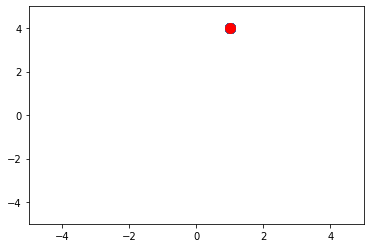

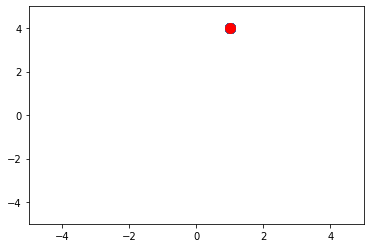

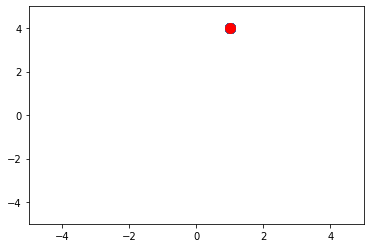

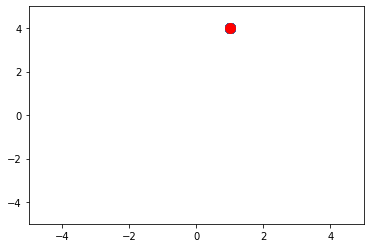

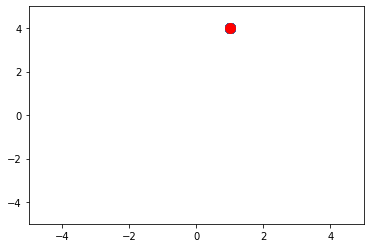

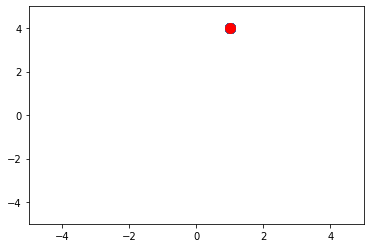

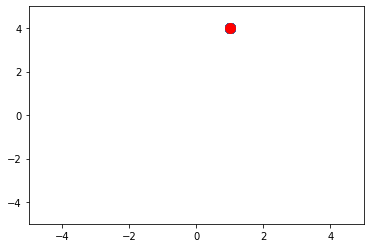

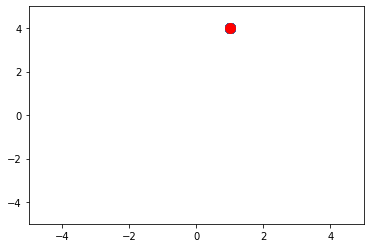

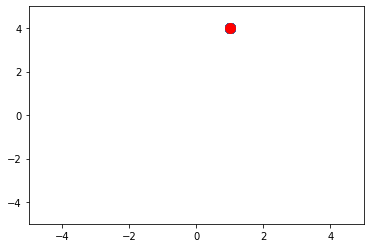

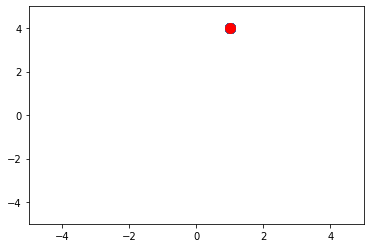

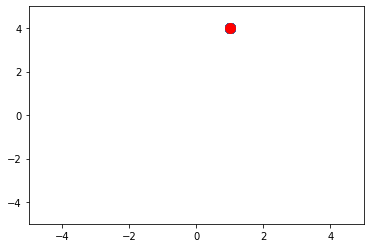

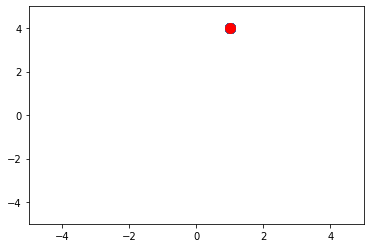

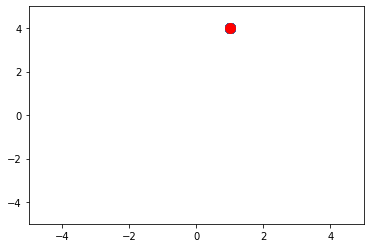

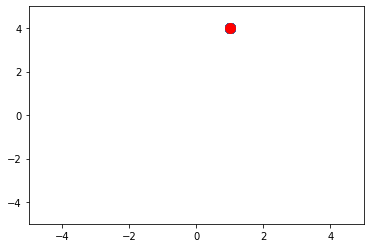

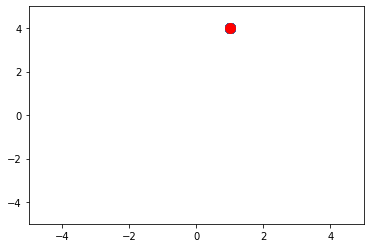

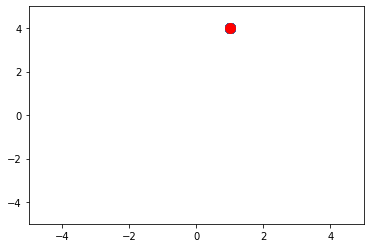

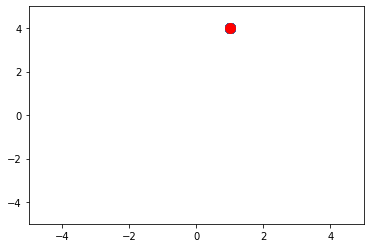

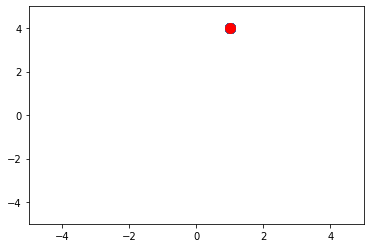

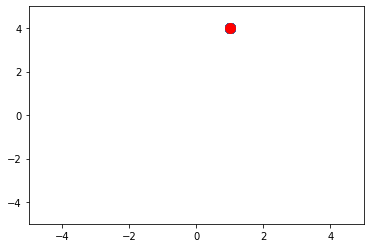

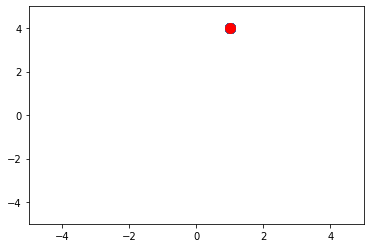

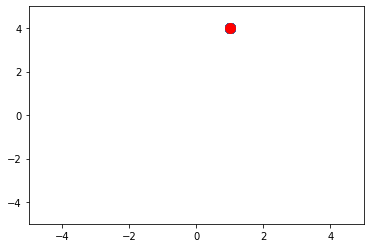

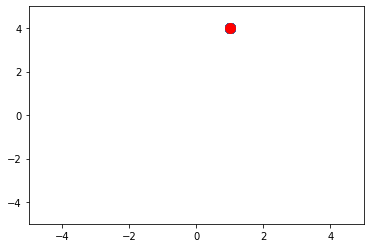

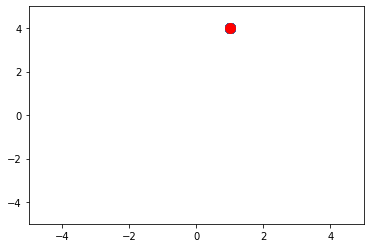

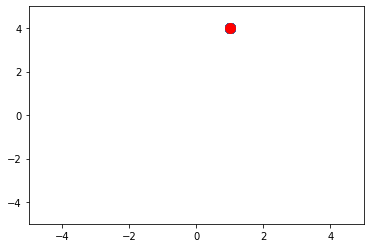

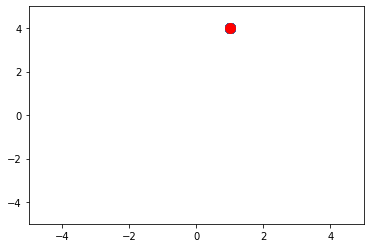

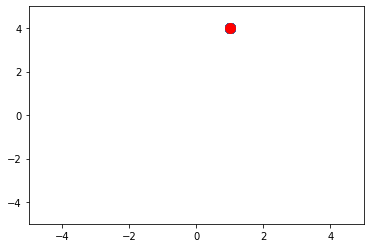

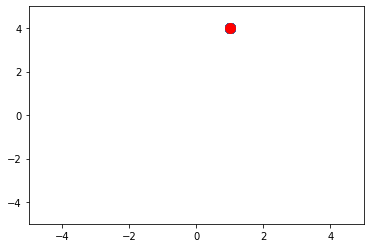

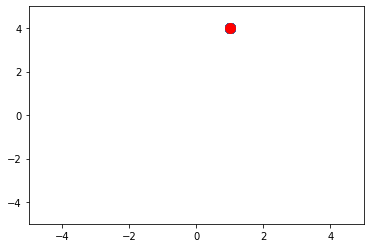

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import copy as cp
import matplotlib as mat
 
 
#Fonction de test du fonctionnement en dimention 3
def test3d(x):
    return x[0]**2+x[1]**2+x[2]**2-48
 
#Fonction de test du fonctionnement en dimention 2
def test2d(x):
    return (x[0]-1)**4+(x[1]-4)**4-16
 
def test7d(x):
    return (x[0]-1)**2+(x[1]-2)**2+(x[2]-3)**2+(x[3]-4)**2+(x[4]-5)**2+(x[5]-6)**2+(x[6]-7)**2-55
 
def test5d(x):
    return (x[0]-5.2)**2+(x[1]-5)**2+(x[2]-3.6)**2+(x[3]-4.1)**2+(x[4]-2.8)**2-55
 
#Fonction d'Himmelblau
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
 
#Test l'égalité entre deux tableaux de points
def equals(x,y):
    n=np.size(x,0)
    m=np.size(x,1)
    for i in range(n):
        for j in range(m):
            if x[i,j] != y[i,j]:
                return False
    return True
 
#Génère le nombre de points voulu dans la dimension voulue de manière aléatoire
def generatePop(dimension,numberOfElements,boundMin,boundMax):
    res=np.zeros((numberOfElements,dimension))
    for i in range(numberOfElements):
        x=np.zeros((dimension))
        for j in range(dimension):
            x[j]=rn.uniform(boundMin,boundMax)
        res[i]=x
    return res
 
#Mise à jour des pbests
def setPBests(parts,pbests,f):
    n=np.size(parts,0)
    res=pbests
    for i in range(n):
        if f(parts[i])< f(pbests[i]):
            res[i]=parts[i]
    return res
 
#Récupération du gbest
def getGBest(pbest,f):
    n=np.size(pbest,0)
    m=np.size(pbest,1)
    test=10000
    gbest=np.zeros((m,))
    for i in range(n):
        if f(pbest[i])<test:
            gbest=pbest[i]
            test=f(pbest[i])
    return gbest
 
#GArde les points dans l'espace souhaité défini au préalable
def bound(x,boundMin,boundMax):
    n=np.size(x,0)
    for i in range(n):
        x[i]=max(x[i],boundMin)
        x[i]=min(x[i],boundMax)
    return x
 
 
#Méthode de PSO fonctionnant en dimension n finie sans affichage graphique
def pso(dim,pop,bmin,bmax,p1,p2,w,f,itmax):
    dots=generatePop(dim,pop,bmin,bmax)
    pbest=dots
    v=np.zeros((pop,dim))
    i=1
    p=0
    while i<=itmax:
        pbest=setPBests(dots,pbest,f)
        gbest=getGBest(pbest,f)
        befdots=cp.deepcopy(dots)
        for j in range(pop):
            v[j]=w*v[j]+p1*rn.uniform(0,1)*(pbest[j]-dots[j])+p2*rn.uniform(0,1)*(gbest-dots[j])
            dots[j]=bound(dots[j]+v[j],bmin,bmax)
        if equals(befdots,dots):
            print("Point fixe, nombre d'itérations :")
            print(i)
            print("(x,y) final")
            print(dots[0])
            print("f(x,y) final")
            print(f(dots[0]))
            return dots,i
        i=i+1
    print("(x,y) final")
    print(dots[0])
    print("f(x,y) final")
    print(f(dots[0]))
    return dots,itmax
 
#PSO pour les fonctions de R2->R avec affichage graphique
#On a en plus les minimums en paramètre afin de les afficher à l'écran
#et rendre plus visible la convergence
def pso2d(pop,bmin,bmax,p1,p2,w,f,itmax,pause,sol):
    dots=generatePop(2,pop,bmin,bmax)
    pbest=dots
    v=np.zeros((pop,2))
    i=0
    p=0
    solx,soly=np.transpose(sol)
    x,y=np.transpose(dots)
    plt.figure(0)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.scatter(x, y, s=100)
    plt.scatter(solx,soly,c='red',s=100)
    plt.show(block=False)
    while i<=itmax:
        plt.clf()
        pbest=setPBests(dots,pbest,f)
        gbest=getGBest(pbest,f)
        befdots=cp.deepcopy(dots)
        for j in range(pop):
            v[j]=w*v[j]+p1*rn.uniform(0,1)*(pbest[j]-dots[j])+p2*rn.uniform(0,1)*(gbest-dots[j])
            dots[j]=bound(dots[j]+v[j],bmin,bmax)
        if equals(befdots,dots):
            print("Point fixe, nombre d'itérations :")
            print(i)
            print("(x,y) final")
            print(dots[0])
            print("f(x,y) final")
            print(f(dots[0]))
            return dots,i
        x,y=np.transpose(dots)
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.scatter(x, y, s=100)
        plt.scatter(solx,soly,c='red',s=100)
        plt.show(block=False)
        if pause != 0:
            plt.pause(pause)
        i=i+1
    print("(x,y) final")
    print(dots[0])
    print("f(x,y) final")
    print(f(dots[0]))
    plt.close()
    return dots,itmax
 
def benchmarkp2():
    #Coordonnées des optimums de la fonction de Himmelblau
    sol=np.array([[3.0,2.0],[-2.805118,3.131312],[-3.779310,-3.283186],[3.584428,-1.848126]])
    print("Début de l'étude de l'impact de la valeur du paramètre d'influence sociale(phi2) sur le nombre d'itérations avant obtention d'un point fixe")
    #Etude de l'influence sociale
    x=[0.01,0.2,0.5,0.75,1.0,1.25,1.5,1.75,2,2.5]
    y=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,10,1):
        print("Valeur de phi2:")
        print(x[i])
        p,it=pso2d(75,-5,5,0.01,x[i],0.1,himmelblau,500,0,sol)
        y[i]=it
        plt.close()
            
    fig = plt.figure(1)
    width = 0.05
 
    plt.bar(x, y, width, color='b' )
    plt.title("Social Influence")
    plt.xlabel("paramètre phi2")
    plt.ylabel("nombre d'itérations")
    plt.savefig('SocialInfluence2.png')
    plt.show(block=False)
    return
 
def benchmarkSize2d():
    print("Début de l'étude de l'impact de la taiile de l'essaim étudié sur le nombre d'itérations avant obtention d'un minimum de la fonction en 2d")
    #Etude de l'influence de la taille de l'essaim
    x=[10,50,100,150,200,250]
    y=[0,0,0,0,0,0]
    for i in range(0,6,1):
        print("Taille de l'essaim:")
        print(x[i])
        p,it=pso2d(x[i],-5,5,0.01,1.2,0.1,himmelblau,500,0,sol)
        y[i]=it
        plt.close()
        
    fig2 = plt.figure(2)
    width = 9
    plt.bar(x, y, width, color='g' )
    plt.title("Swarm size dimension 2")
    plt.xlabel("population")
    plt.ylabel("nombre d'itérations")
    plt.savefig('SwarmSize2d.png')
    plt.show(block =False)
    return
 
def benchmarkSize5d():
    print("Début de l'étude de l'impact de la taiile de l'essaim étudié sur le nombre d'itérations avant obtention d'un minimum de la fonction en 5d")
    #Etude de l'influence de la taille de l'essaim
    x=[10,50,150,200,300,400]
    y=[0,0,0,0,0,0]
    for i in range(0,6,1):
        print("Taille de l'essaim:")
        print(x[i])
        p,it=pso(5,x[i],-8,8,0.1,1.2,0.1,test5d,1500)
        y[i]=it
        plt.close()
        
    fig2 = plt.figure(3)
    width = 9
    plt.bar(x, y, width, color='g' )
    plt.title("Swarm size dimension 5")
    plt.xlabel("population")
    plt.ylabel("nombre d'itérations")
    plt.savefig('SwarmSize5d.png')
    plt.show(block =False)
    return
 
def tests():
    print("Test sur une foction de R3->R, f(x,y,z)=x^2+y^2+z^2-48")
    pso(3,200,-6,6,0.05,1.2,0.1,test3d,1000)
    print("Test sur une foction de R7->R avec affichage graphique, f(x,y)=(x-1)^2+(y-2)^2+(z-3)^2+(t-4)^2+(s-5)^2+(v-6)^2+(u-7)^2-55")
    pso(7,300,-8,8,0.5,1.2,0.1,test7d,1500)
    print("Test sur une foction de R2->R avec affichage graphique, f(x,y)=(x-1)^4+(y-4)^4-16")
    #Minimum de la fonction atteint en (1,4)
    sol2d=np.array([1,4])
    pso2d(75,-5,5,0.01,1.25,0.1,test2d,300,0.5,sol2d)
    print("Test sur la fonction d'Himmelblau")
    #Minimums de la fonction d'Himmelblau
    sol=np.array([[3.0,2.0],[-2.805118,3.131312],[-3.779310,-3.283186],[3.584428,-1.848126]])
    pso2d(100,-5,5,0.1,1.2,0.1,himmelblau,500,0.3,sol)
    return
 
 
#Décommentez les fonctions que vous voulez tester
tests()
#benchmarkp2()
#benchmarkSize2d()
#benchmarkSize5d()